In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478998  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490199  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386965  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375157  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417541  447610800

In [3]:
df.tail()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-12-23  70.132500  71.062500  70.092499  71.000000  69.170464   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.236244   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.609909   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.583122  146266000
2019-12-30  72.364998  73.172501  71.305000  72.879997  71.002037  144114400

In [4]:
df = df.reset_index()
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478998  493729600
1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490199  601904800
2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386965  552160000
3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375157  477131200
4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417541  447610800

In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800

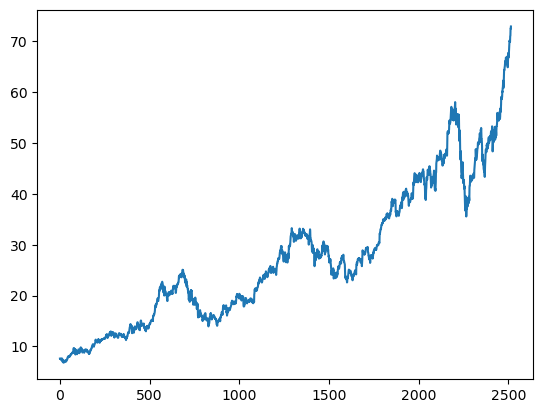

In [6]:
plt.plot(df.Close)

In [7]:
df

Open       High        Low      Close     Volume
0      7.622500   7.660714   7.585000   7.643214  493729600
1      7.664286   7.699643   7.616071   7.656429  601904800
2      7.656429   7.686786   7.526786   7.534643  552160000
3      7.562500   7.571429   7.466071   7.520714  477131200
4      7.510714   7.571429   7.466429   7.570714  447610800
...         ...        ...        ...        ...        ...
2510  70.132500  71.062500  70.092499  71.000000   98572000
2511  71.172501  71.222504  70.730003  71.067497   48478800
2512  71.205002  72.495003  71.175003  72.477501   93121200
2513  72.779999  73.492500  72.029999  72.449997  146266000
2514  72.364998  73.172501  71.305000  72.879997  144114400

[2515 rows x 5 columns]

In [8]:
na100 = df.Close.rolling(100).mean()
na100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

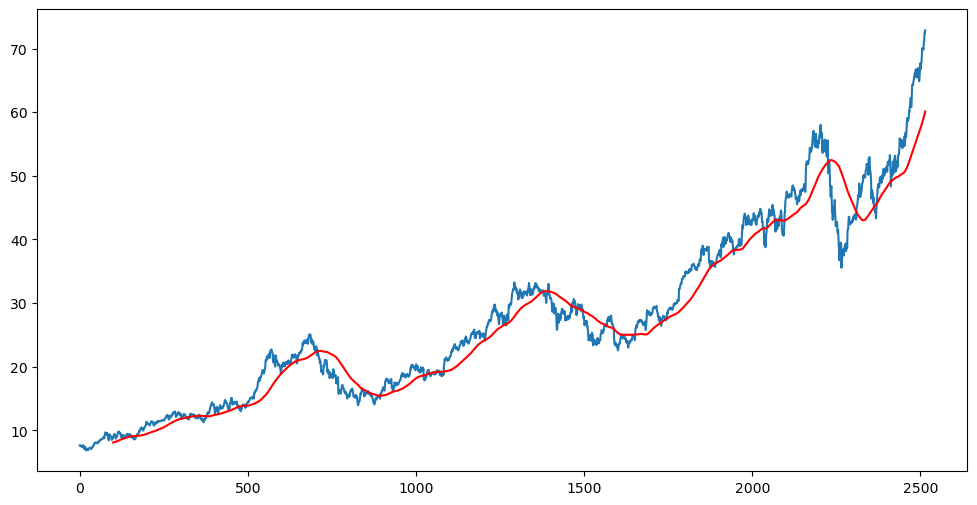

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(na100, 'r')

In [10]:
na100 = df.Close.rolling(100).mean()
na100
na200 = df.Close.rolling(200).mean()
na200 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

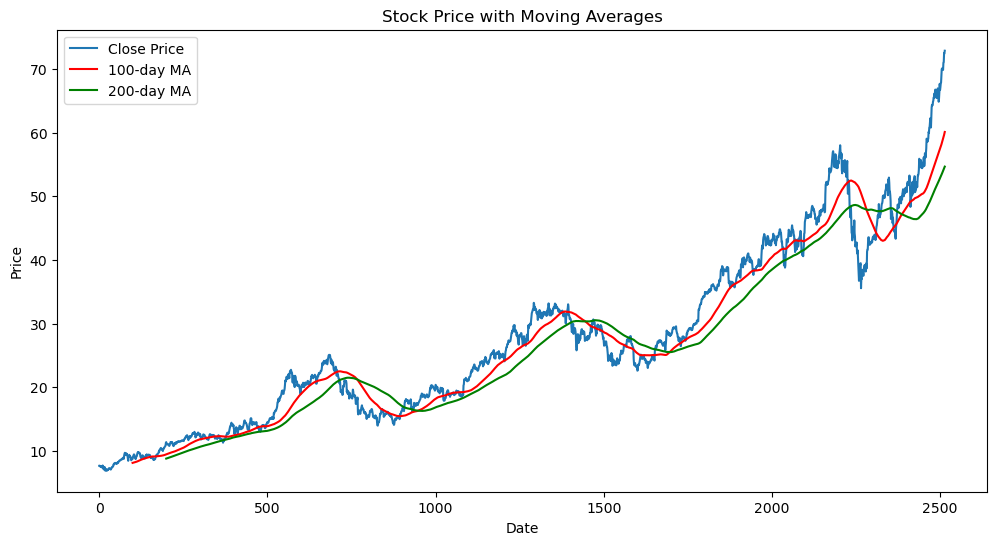

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(na100, 'r', label='100-day MA')
plt.plot(na200, 'g', label='200-day MA')

plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [12]:
df.shape


(2515, 5)

In [13]:
#Splitting data into training and testing

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [15]:
data_training.head()

Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714

In [16]:
data_testing.head()

Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [19]:
data_training_array.shape

(1760, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [21]:
x_train.shape

(1660, 100, 1)

In [22]:
!pip install tensorflow

In [23]:
!pip install keras

In [24]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
               
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))
               
model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))   


model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs =50)


Epoch 1/50

52/52 [==============================] - 24s 283ms/step - loss: 0.0465
Epoch 2/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0137
Epoch 3/50
52/52 [==============================] - 15s 279ms/step - loss: 0.0109
Epoch 4/50
52/52 [==============================] - 13s 259ms/step - loss: 0.0089
Epoch 5/50
52/52 [==============================] - 14s 269ms/step - loss: 0.0095
Epoch 6/50
52/52 [==============================] - 13s 259ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0077
Epoch 8/50
52/52 [==============================] - 15s 289ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0076
Epoch 10/50
52/52 [==============================] - 23s 449ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 19s 367ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0067
Epoch 13/50

In [28]:
model.save('keras_model.h5')

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
data_testing.head()

Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500

In [30]:
data_training.tail(100)

Close
1660  27.092501
1661  27.202499
1662  27.000000
1663  26.982500
1664  27.045000
...         ...
1755  29.264999
1756  29.072500
1757  29.129999
1758  29.315001
1759  29.190001

[100 rows x 1 columns]

In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6968\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [33]:
final_df.head()

Close
0  27.092501
1  27.202499
2  27.000000
3  26.982500
4  27.045000

In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [35]:
input_data.shape

(855, 1)

In [36]:
x_test =[]
y_test =[]


for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [38]:
##Making prediction

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 93ms/step


In [39]:
y_predicted.shape

(755, 1)

In [40]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [41]:
y_predicted

array([[0.11692049],
       [0.11692049],
       [0.11692049],
       [0.11692049],
       [0.11692049],
       [0.11692049],
       [0.11692049],
       [0.1169205 ],
       [0.11692053],
       [0.11692062],
       [0.11692077],
       [0.11692102],
       [0.11692141],
       [0.11692208],
       [0.116923  ],
       [0.1169243 ],
       [0.11692598],
       [0.11692807],
       [0.11693113],
       [0.11693574],
       [0.1169425 ],
       [0.11695184],
       [0.11696374],
       [0.1169935 ],
       [0.11707185],
       [0.11723666],
       [0.11753556],
       [0.11801986],
       [0.11873552],
       [0.1197165 ],
       [0.12097669],
       [0.12252013],
       [0.12435043],
       [0.12646496],
       [0.12885158],
       [0.13149029],
       [0.13436532],
       [0.13746026],
       [0.14075202],
       [0.144211  ],
       [0.14780481],
       [0.15149665],
       [0.15527092],
       [0.15911072],
       [0.16300277],
       [0.16692825],
       [0.17086518],
       [0.174

In [42]:
scaler.scale_

array([0.02123255])

In [43]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

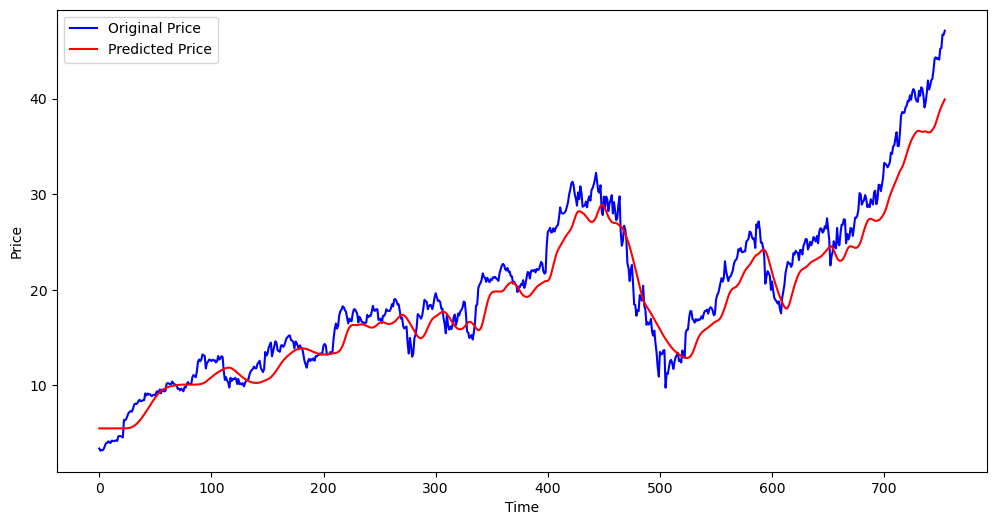

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()